In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt

In [64]:
cat_path  = "cat.csv"
data_path = "data.csv"

all_cat = open(cat_path, 'r').read().split(",")
all_cat.sort()
# Category dictionary
cat_dict = {cat:index for (index, cat) in enumerate(all_cat)}

df = pd.read_csv(data_path)

# delete the NAs
df.dropna(inplace = True)

# delete the duplicated paper
df.drop_duplicates(subset = "paper ID", inplace = True)

In [68]:
df.shape

(119339, 4)

In [72]:
df.replace('ao-sci', "physics", inplace=True)

In [73]:
# Collecting all the aurhors
au_lst = []
for paper_authors in df["Authors"].values:
    for author in paper_authors.split(";"):
        au_lst.append(author)
        
# Get all the unique authors       
au_lst = list(set(au_lst))
au_lst.sort()

au_dict = {author:index for (index, author) in enumerate(au_lst)}

In [74]:
# Creating the matrix
n = len(au_dict)
p = len(all_cat)
credit_matrix = np.zeros((n, p))

for index, row in df[["Authors", "Category"]].iterrows():
    author_list = row["Authors"].split(";")
    contribute = 1.0/len(au_lst)
    for author in author_list:
        try:
            credit_matrix[ au_dict[author], cat_dict[row["Category"]] ] += contribute
        except KeyError as e:
            print(e)

# Calculating stuff
author_activity = credit_matrix / credit_matrix.sum(axis=1, keepdims=True)
author_weight_in_field = credit_matrix / credit_matrix.sum(axis=0, keepdims=True)
field_field_influence = np.transpose(author_activity).dot(author_weight_in_field)

proj1_df = pd.DataFrame(field_field_influence, columns = all_cat, index=all_cat)
proj1_df

,astro-ph,cond-mat,cs,econ,eess,gr-qc,hep-ex,hep-lat,hep-ph,hep-th,math,math-ph,nlin,nucl-ex,nucl-th,physics,q-bio,q-fin,quant-ph,stat
astro-ph,0.955,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.008,0.001,0.000,0.000,0.000,0.000,0.006,0.001,0.000,0.000,0.001,0.000
cond-mat,0.002,0.880,0.002,0.000,0.001,0.019,0.004,0.018,0.007,0.015,0.002,0.022,0.034,0.004,0.015,0.022,0.027,0.024,0.030,0.002
cs,0.004,0.007,0.958,0.047,0.105,0.000,0.005,0.008,0.008,0.004,0.023,0.007,0.021,0.004,0.002,0.015,0.023,0.024,0.013,0.064
econ,0.000,0.000,0.000,0.821,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
eess,0.000,0.000,0.001,0.000,0.854,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
gr-qc,0.000,0.000,0.000,0.000,0.000,0.794,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
hep-ex,0.000,0.000,0.000,0.000,0.001,0.000,0.884,0.001,0.003,0.000,0.000,0.001,0.000,0.013,0.001,0.003,0.000,0.000,0.000,0.000
hep-lat,0.001,0.002,0.000,0.000,0.000,0.000,0.001,0.930,0.011,0.008,0.000,0.003,0.000,0.001,0.002,0.001,0.001,0.000,0.002,0.000
hep-ph,0.006,0.001,0.000,0.000,0.000,0.000,0.002,0.008,0.893,0.021,0.000,0.001,0.001,0.000,0.008,0.001,0.000,0.000,0.002,0.000
hep-th,0.000,0.001,0.000,0.000,0.000,0.019,0.000,0.006,0.020,0.894,0.001,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.005,0.000


# Project 2

In [15]:
from setup import *

In [16]:
# Declaring variables
num_field = len(all_cat)
num_author = len(au_dict)
num_steps = 2


current_credit = credit_matrix.copy()

# Funding money
d = np.random.rand(num_field)
current_field_funding = d / d.sum()

def update_author_funding(credit, field_funding):
    author_weight_in_field = credit / credit.sum(axis=0,keepdims=True)
    author_funding_from_field = author_weight_in_field * field_funding
    author_funding = author_funding_from_field.sum(axis=1,keepdims=True)
    return author_funding

def compute_credit(author_funding):
    new_credit = author_prod * author_funding
    field_credit = new_credit.sum(axis=0)
    author_credit = new_credit.sum(axis=1)
    total_credit = new_credit.sum()
    return new_credit, total_credit
    
current_author_funding = update_author_funding(current_credit, current_field_funding)
author_prod = current_credit / current_author_funding
current_credit, current_total_credit = compute_credit(current_author_funding)

for i in range(num_steps):
    # Pick a random "direction" to move funding levels and computes effect on credit.
    v = np.random.rand(num_field)
    v -= v.mean()  # to make sure funding levels sum to 1
    x = current_field_funding
    # Makes sure we don't set any funding less than 0 or more than 1
    k0 = ((np.zeros_like(x) - x) / v).max()
    k1 = (( np.ones_like(x) - x) / v).max()
    k = min(k0,k1)*0.05

    new_field_funding = current_field_funding + k*v
    new_author_funding = update_author_funding(current_credit, new_field_funding)
    new_credit, new_total_credit = compute_credit(new_author_funding)
    best_field_fund, best_credit, best_total_credit = current_field_funding, current_credit, current_total_credit
    
    current_field_funding, current_credit, current_total_credit = new_field_funding, new_credit, new_total_credit
    if(best_total_credit < current_total_credit):
        best_field_funding, best_credit, best_total_credit = current_field_funding, current_credit, current_total_credit
    print("Current Field Funding")
    print(current_field_funding)
    print("Current Credit")
    display(margins(current_credit))
print("Best Field Funding")
print(best_field_funding)
print("Best Credit")
display(margins(best_credit))

Current Field Funding
[ 0.07240119  0.06816741  0.09179104 -0.01983803  0.10059717  0.07388094
 -0.00300103  0.04353213  0.04803258 -0.01688507  0.02414971  0.03574476
  0.08442842  0.03301856  0.1263789  -0.01570417  0.10124838  0.00353343
  0.03736193  0.11116175]
Current Credit


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,TOTAL
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
3,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
4,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2757,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,-0.000,-0.000,-0.001,-0.000,-0.000,-0.000,-0.000,-0.001
2758,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
2759,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001


Current Field Funding
[ 0.08633156  0.05473651  0.08720149 -0.01386219  0.11011058  0.08601956
  0.00627872  0.03899101  0.043298   -0.03354796  0.02589807  0.04319356
  0.0888231   0.04167094  0.11007484 -0.00660461  0.09202888 -0.0096984
  0.02352064  0.12553569]
Current Credit


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,TOTAL
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2757,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
2758,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
2759,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001


Best Field Funding
[ 0.08633156  0.05473651  0.08720149 -0.01386219  0.11011058  0.08601956
  0.00627872  0.03899101  0.043298   -0.03354796  0.02589807  0.04319356
  0.0888231   0.04167094  0.11007484 -0.00660461  0.09202888 -0.0096984
  0.02352064  0.12553569]
Best Credit


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,TOTAL
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2757,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000
2758,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
2759,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001


# Project 3
Text Classifier

In [50]:
df_proj3 = df[["Title", "Category"]].copy()

# removing the new line character
for index, val in enumerate(df_proj3["Title"]):
    if "\n" in val:
        df_proj3["Title"].iloc[index] = val.replace("\n","")

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model2 = make_pipeline(TfidfVectorizer(), LogisticRegression())
model3 = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

In [85]:
train, test = train_test_split(df_proj3, test_size=0.33, random_state=42)

In [86]:
model.fit(train["Title"].values, train["Category"].values)
pred = model.predict(test["Title"].values)

In [87]:
model2.fit(train["Title"].values, train["Category"].values)
pred2 = model2.predict(test["Title"].values)

In [88]:
model3.fit(train["Title"].values, train["Category"].values)
pred3 = model3.predict(test["Title"].values)

In [89]:
accuracy_score(y_test, pred)

0.46578366445916114

In [90]:
accuracy_score(y_test, pred2)

0.43267108167770418

In [91]:
accuracy_score(y_test, pred3)

0.38852097130242824

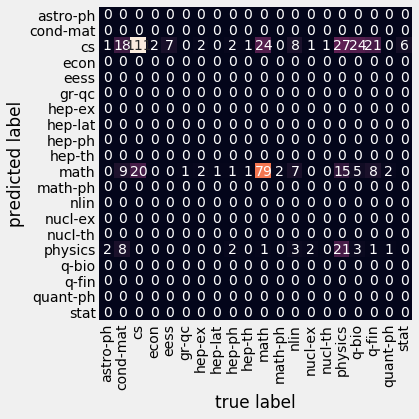

In [62]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=all_cat, yticklabels=all_cat)
plt.xlabel('true label')
plt.ylabel('predicted label');

plt.show()